# Grabbing Nox Player

'nox_size' : (720, 1280)

스크린샷 경로 : C:\Users\KH_Home\Nox_share\ImageShare\Screenshots

In [1]:
from rok_launcher import NoxManager

In [2]:
config = {
    'nox_size' : (720, 1280)
}

-------------------------------------
Run Nox Application and Press Any Key
Now Find Nox Position


Refining Nox Position


Finished


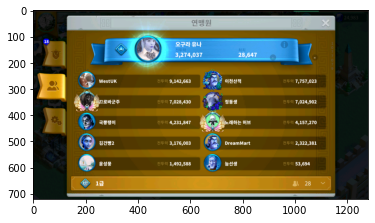

In [3]:
manager = NoxManager(config=config, verbose=False)

# manager 로 실행

In [ ]:
manager.capture_R4()

In [ ]:
manager.capture_R3()

In [ ]:
manager.capture_R2()

In [4]:
manager.capture_R1()

CAN NOT FIND CAPTURE, OPENING NOX MENU
